<a href="https://colab.research.google.com/github/samuelpsouza/distributed-computing/blob/main/lab09/cross_device.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q "flwr-datasets[vision]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2024.3.1 which is incompatible.


In [2]:
!pip install -U "flwr[simulation]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.1/465.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.5
    Uninstalling typer-0.12.5:
      Successfully uninstalled typer-0.12.5
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.1
    Uninstalling cryptography-43.0.1:
      Successfully uninstalled cryptography-43.0.1
ERROR: pip's dependency resolver d

In [3]:
!pip install ray

## Importing Modules

In [4]:
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner, DirichletPartitioner
from flwr_datasets.visualization import plot_label_distributions, plot_comparison_label_distribution

## IID Partitioning

In [5]:
fds_iid = FederatedDataset(
    dataset="cifar10",
    partitioners={"train": IidPartitioner(num_partitions=20)}
)

partitioner = fds_iid.partitioners["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

## Ploting

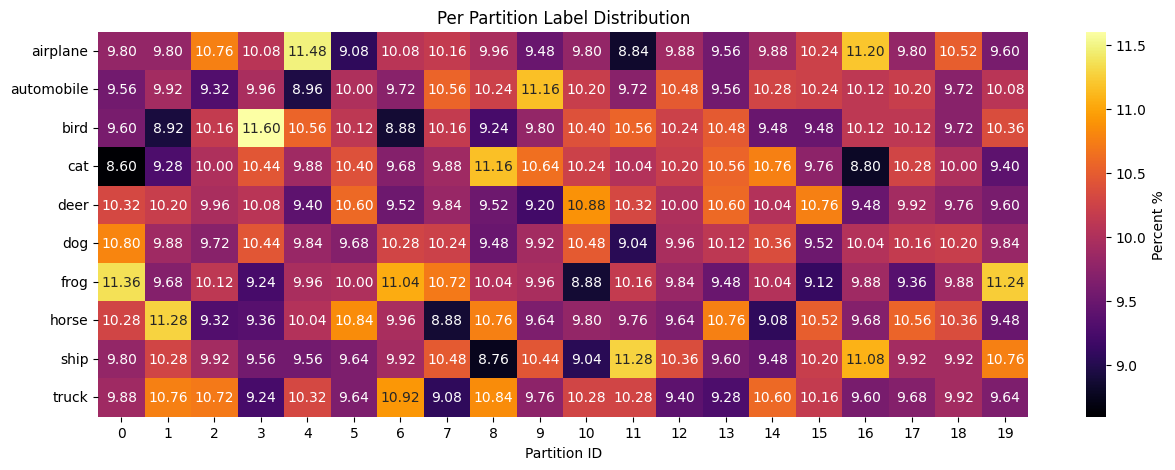

In [6]:
figure, axis, dataframe = plot_label_distributions(
    partitioner=partitioner,
    label_name="label",
    size_unit="percent",
    plot_type="heatmap",
    legend=True,
    cmap="inferno",
    figsize=(15,5),
    plot_kwargs={"annot": True}
)

## Non-IID Partitining

In [7]:
fds_niid = FederatedDataset(
    dataset="cifar10",
    partitioners={
        "train": DirichletPartitioner(
            num_partitions=20,
            partition_by="label",
            alpha=0.1,
            min_partition_size=0
        )
    }
)

partitioner = fds_niid.partitioners["train"]

## Ploting

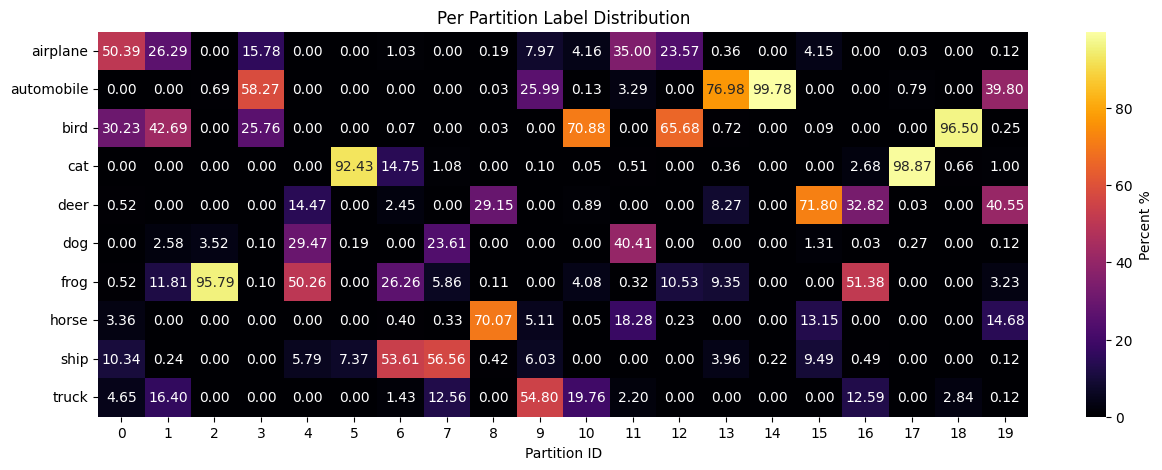

In [8]:
figure, axis, dataframe = plot_label_distributions(
    partitioner=partitioner,
    label_name="label",
    size_unit="percent",
    plot_type="heatmap",
    legend=True,
    cmap="inferno",
    figsize=(15,5),
    plot_kwargs={"annot": True}
)

## Exploring Alpha

In [9]:
partitioner_list = []
alpha_list = [10_000.0, 100.0, 1.0, 0.1, 0.01, 0.00001]

for alpha in alpha_list:
    fds = FederatedDataset(
        dataset="cifar10",
        partitioners={
            "train": DirichletPartitioner(
                num_partitions=20,
                partition_by="label",
                alpha=alpha,
                min_partition_size=0
            )
        }
    )

    partitioner_list.append(fds.partitioners["train"])

## Ploting

/usr/local/lib/python3.10/dist-packages/flwr_datasets/visualization/comparison_label_distribution.py:213: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


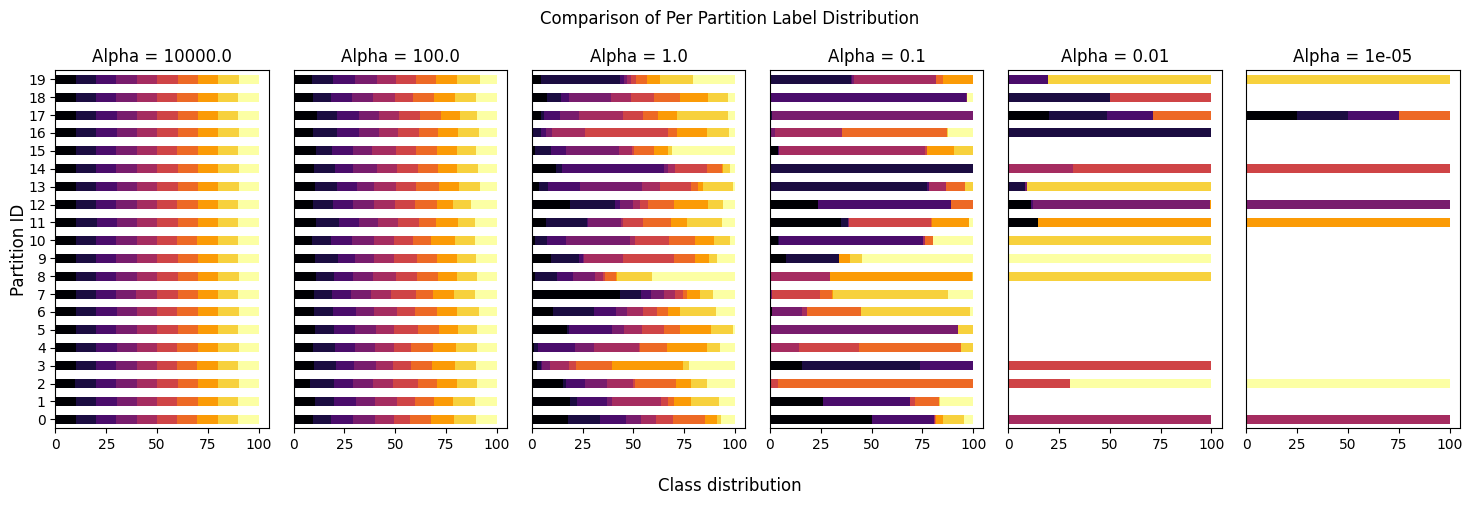

In [10]:
fig, axes, dataframe_list = plot_comparison_label_distribution(
    partitioner_list=partitioner_list,
    label_name="label",
    cmap="inferno",
    figsize=(15, 5),
    titles=[f"Alpha = {alpha}" for alpha in alpha_list],
)

## Installing and Importing Flower

In [11]:
!pip install flwr tensorflow

In [12]:
import flwr as fl
import tensorflow as tf
import numpy as np

from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner, DirichletPartitioner
from flwr_datasets.visualization import plot_label_distributions, plot_comparison_label_distribution

## Client Implementation

In [13]:
class Cliente(fl.client.NumPyClient):
    def __init__(self, cid, niid, num_clients, dirichlet_alpha):
         self.cid             = int(cid)
         self.niid            = niid
         self.num_clients     = num_clients
         self.dirichlet_alpha = dirichlet_alpha

         self.x_train, self.y_train, self.x_test, self.y_test = self.load_data()
         self.model                                           = self.create_model(self.x_train.shape)

    def get_parameters(self, config):
        return self.model.get_weights()

    def load_data(self):
        if self.niid:
            partitioner_train = DirichletPartitioner(num_partitions=self.num_clients, partition_by="label",
                                    alpha=self.dirichlet_alpha, min_partition_size=0,
                                    self_balancing=False)
            partitioner_test = DirichletPartitioner(num_partitions=self.num_clients, partition_by="label",
                                    alpha=self.dirichlet_alpha, min_partition_size=0,
                                    self_balancing=False)
        else:
            partitioner_train =  IidPartitioner(num_partitions=self.num_clients)
            partitioner_test  = IidPartitioner(num_partitions=self.num_clients)

        fds               = FederatedDataset(dataset='mnist', partitioners={"train": partitioner_train})
        train             = fds.load_partition(self.cid).with_format("numpy")

        fds_eval          = FederatedDataset(dataset='mnist', partitioners={"test": partitioner_test})
        test              = fds_eval.load_partition(self.cid).with_format("numpy")

        return train['image']/255.0, train['label'], test['image']/255.0, test['label']

    def create_model(self, input_shape):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(28, 28, 1)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16,  activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax'),

        ])

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        return model

    def fit(self, parameters, config):
          self.model.set_weights(parameters)

          history = self.model.fit(self.x_train, self.y_train, epochs=1)
          acc     = np.mean(history.history['accuracy'])
          loss    = np.mean(history.history['loss'])

          trained_parameters = self.model.get_weights()

          fit_msg = {
              'cid'     : self.cid,
              'accuracy': acc,
              'loss'    : loss,
          }

          self.log_client('train.csv', config['server_round'], acc, loss)
          return trained_parameters, len(self.x_train), fit_msg

    def evaluate(self, parameters, config):
          self.model.set_weights(parameters)
          loss, acc = self.model.evaluate(self.x_test, self.y_test)
          eval_msg = {
              'cid'     : self.cid,
              'accuracy': acc,
              'loss'    : loss
          }
          self.log_client('evaluate.csv', config['server_round'], acc, loss)
          return loss, len(self.x_test), eval_msg

    def log_client(self, file_name, server_round, acc, loss):
        with open(file_name, 'a') as file:
            file.write(f'{server_round}, {self.cid}, {acc}, {loss}\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Server Implementation

In [24]:
from flwr.common import FitIns
from flwr.common import parameters_to_ndarrays
from flwr.common import ndarrays_to_parameters
from flwr.common import EvaluateIns

from flwr.server.strategy import aggregate
import random

class Servidor(fl.server.strategy.FedAvg):
    def __init__(self, num_clients, dirichlet_alpha, fraction_fit=0.2):
        self.num_clients     = num_clients
        self.dirichlet_alpha = dirichlet_alpha

        self.clients_data = {
            "training_clients": [],
            "validation_clients": []
        }

        super().__init__(fraction_fit=fraction_fit, min_available_clients=num_clients)


    def configure_fit(self, server_round, parameters, client_manager):
        """Configure the next round of training."""

        config = {
            'server_round': server_round,
        }
        fit_ins = FitIns(parameters, config)

        sample_size, min_num_clients = self.num_fit_clients(
            client_manager.num_available()
        )
        clients = client_manager.sample(
            num_clients=sample_size, min_num_clients=min_num_clients
        )

        training_percentage = int(len(clients) * 0.7)

        self.clients_data["training_clients"] = random.sample(clients, training_percentage)
        self.clients_data["validation_clients"] = list(set(clients) - set(self.clients_data["training_clients"]))

        # Return client/config pairs
        print(clients)
        print(self.clients_data["training_clients"])
        return [(client, fit_ins) for client in self.clients_data["training_clients"]]

    def aggregate_fit(self, server_round, results, failures):
        parameters_list = []
        for _, fit_res in results:
            parameters = parameters_to_ndarrays(fit_res.parameters)
            exemplos   = int(fit_res.num_examples)

            parameters_list.append([parameters, exemplos])

        agg_parameters = aggregate.aggregate(parameters_list)
        agg_parameters = ndarrays_to_parameters(agg_parameters)

        return agg_parameters, {}

    def configure_evaluate(self, server_round, parameters, client_manager):
        config = {
            'server_round': server_round,
        }

        evaluate_ins = EvaluateIns(parameters, config)


        # sample_size, min_num_clients = self.num_evaluation_clients(
        #     client_manager.num_available()
        # )

        # clients = client_manager.sample(
        #     num_clients=sample_size, min_num_clients=min_num_clients
        # )
        print(self.clients_data["validation_clients"])
        return [(client, evaluate_ins) for client in self.clients_data["validation_clients"]]

    def aggregate_evaluate(self, server_round, results, failures):
        accuracies = []

        for _, response in results:
            acc = response.metrics['accuracy']
            accuracies.append(acc)

        avg_acc = sum(accuracies)/len(accuracies)
        print(f"Rodada {server_round} acurácia agregada: {avg_acc}")

        return avg_acc, {}


# Flower Simulation NIID

In [16]:
NCLIENTS        = 20
NROUNDS         = 20
NIID            = True
DIRICHLET_ALPHA = 0.1
FRACTION_FIT    = 0.2

In [17]:
def create_client(cid):
    client = Cliente(cid, NIID, NCLIENTS, DIRICHLET_ALPHA)
    return client.to_client()

In [25]:
class Simulation():
    def __init__(self):
        self.server  = Servidor(num_clients=NCLIENTS, dirichlet_alpha=DIRICHLET_ALPHA, fraction_fit=FRACTION_FIT)

    def run_simulation(self):
        fl.simulation.start_simulation(
            client_fn     = create_client,
            num_clients   = NCLIENTS,
            config        = fl.server.ServerConfig(num_rounds=NROUNDS),
            strategy      = self.server)

Simulation().run_simulation()

INFO :      Starting Flower simulation, config: num_rounds=20, no round_timeout
2024-10-07 00:30:55,005	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'memory': 7980139316.0, 'object_store_memory': 3990069657.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=3500) 2024-10-07 00:30:59.670485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already bee

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a022c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a902b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a902b0>]


(ClientAppActor pid=3499) /usr/local/lib/python3.10/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
(ClientAppActor pid=3499) given by the platformdirs library.  To remove this warning and
(ClientAppActor pid=3499) see the appropriate new directories, set the environment variable
(ClientAppActor pid=3499) `JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
(ClientAppActor pid=3499) The use of platformdirs will be the default in `jupyter_core` v6
(ClientAppActor pid=3499)   from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499) 
(ClientAppActor pid=3499)             This is a deprecated f

  1/147 ━━━━━━━━━━━━━━━━━━━━ 2:16 933ms/step - accuracy: 0.6875 - loss: 1.8454
 56/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.8505
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9217 - loss: 0.5008


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


21/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2354 - loss: 2.1787     
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4069 - loss: 1.7112
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a022c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>]


(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499) 
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.
(ClientAppActor pid=3499)         
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500) 
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3500)         


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1176 - loss: 3.7006  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500) 
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3500)         
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499) 
(ClientAppActor pid=3499)             Th

Rodada 1 acurácia agregada: 0.4546875134110451
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7834 - loss: 0.7453  
 1/17 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.2188 - loss: 1.4195
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7272 - loss: 0.8649


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 56/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6075 - loss: 1.4372
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>]
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7364 - loss: 0.9801


(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)          [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)            

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7138 - loss: 1.7482  
  1/129 ━━━━━━━━━━━━━━━━━━━━ 2:35 1s/step - accuracy: 0.3125 - loss: 3.2100


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated featur

Rodada 2 acurácia agregada: 0.45116396248340607
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>]
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2099 - loss: 3.3820
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0996 - loss: 3.2409
16/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0466 - loss: 4.2591        
43/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3669 - loss: 2.8182


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


76/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5492 - loss: 2.0396
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>]
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5837 - loss: 1.8896


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 failures
IN

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.3463  
Rodada 3 acurácia agregada: 0.0
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 5.4611  


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


 1/39 ━━━━━━━━━━━━━━━━━━━━ 2:03 3s/step - accuracy: 0.7188 - loss: 2.1234
17/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6399 - loss: 1.8204
33/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6261 - loss: 1.5814
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6273 - loss: 1.5067
 21/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3584 - loss: 2.1214
 38/122 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4995 - loss: 1.6442


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 60/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5969 - loss: 1.3280
 91/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6747 - loss: 1.0788
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>]


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7231 - loss: 0.9206
 1/22 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.4375 - loss: 2.2514 [repeated 2x across cluster]
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4956 - loss: 2.2090


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated featur

Rodada 4 acurácia agregada: 0.6504955291748047
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a905b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90670>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90670>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a905b0>]
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7775 - loss: 1.7298  
 1/59 ━━━━━━━━━━━━━━━━━━━━ 2:54 3s/step - accuracy: 0.1562 - loss: 7.3013 [repeated 2x across cluster]
17/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1816 - loss: 4.6388 
34/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3895 - loss: 3.2649
47/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.486

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 24/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6094 - loss: 2.1561 
 74/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7579 - loss: 1.2311
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8073 - loss: 0.9530
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.8746  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/21 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.1562 - loss: 3.2811
Rodada 5 acurácia agregada: 0.44448886811733246
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>]
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1377 - loss: 3.8091  


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


 1/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1875 - loss: 3.0347
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1928 - loss: 2.4944
 26/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - loss: 0.8726    
 80/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.5724


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


129/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8685 - loss: 0.4697
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>]
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.4108


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8562 - loss: 0.3856  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated featur

Rodada 6 acurácia agregada: 0.4303797483444214
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a904f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>]
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 9.4454  
 1/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.0312 - loss: 8.9677
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0797 - loss: 5.8411
 32/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9715 - loss: 0.0967 
 95/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.1121


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


155/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1133
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a904f0>]
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9657 - loss: 0.1133


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0423 - loss: 7.6091  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


20/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6191 - loss: 3.1982   
Rodada 7 acurácia agregada: 0.3131609223783016
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a908b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a908b0>]
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5904 - loss: 3.4975


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


 16/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1599 - loss: 6.6111 
 45/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3147 - loss: 4.3642
 72/139 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4398 - loss: 3.4020
101/139 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5260 - loss: 2.8011
133/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5896 - loss: 2.3764
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6008 - loss: 2.3034
 25/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6066 - loss: 2.8558 


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppAct

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0121 - loss: 5.6666      
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7636 - loss: 1.1702 [repeated 3x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated featur

Rodada 8 acurácia agregada: 0.27139750961214304
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a904f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a902b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a902b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>]
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5606 - loss: 1.2671  
19/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5269 - loss: 1.7971 
38/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6355 - loss: 1.3716
54/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6851 - loss: 1.1784
67/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7138 - loss: 1.0693
76/76 ━━━━━━

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


314/339 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8803 - loss: 0.3585
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a904f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>]
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8835 - loss: 0.3499


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6830 - loss: 1.7596  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3499) WARNING:tensorflow:5 out of the last 30 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x798cbd707130> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature 

Rodada 9 acurácia agregada: 0.548958346247673
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a903a0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a903a0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4070 - loss: 5.0385  
 1/54 ━━━━━━━━━━━━━━━━━━━━ 2:34 3s/step - accuracy: 0.7812 - loss: 0.7390
21/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9349 - loss: 0.2677
41/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9561 - loss: 0.1803
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9635 - loss: 0.1500
 18/129 ━━━━━━━━

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 85/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: 1.0162
120/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8279 - loss: 0.8383
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]


(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3499)             entirely in future versions of Flower.


129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8342 - loss: 0.8012
25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4517 - loss: 1.7986   
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4497 - loss: 1.7959


(ClientAppActor pid=3499) WARNING:tensorflow:5 out of the last 12 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x798cbe589a20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
(ClientAppActor pid=3499)          [repeated 2x across cluster]
INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4595 - loss: 1.6655  
Rodada 10 acurácia agregada: 0.4540562033653259
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a905b0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a905b0>]


(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed
(ClientAppActor pid=3500)             entirely in future versions of Flower.


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6462 - loss: 1.2277


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/59 ━━━━━━━━━━━━━━━━━━━━ 46s 809ms/step - accuracy: 0.9062 - loss: 0.2989
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1360


(ClientAppActor pid=3500)          [repeated 6x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1599 - loss: 3.0709  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


Rodada 11 acurácia agregada: 0.49809588491916656
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a036d0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a022c0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a036d0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>]
 30/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9869 - loss: 0.0519     [repeated 2x across cluster]
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0372


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 96/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9341 - loss: 0.2127
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a022c0>]
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9480 - loss: 0.1721


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4197 - loss: 7.5969   [repeated 2x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 13]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


Rodada 12 acurácia agregada: 0.3601127564907074
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90730>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>]
 15/175 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9145 - loss: 0.2657  [repeated 2x across cluster]
 44/175 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9417 - loss: 0.1916
 77/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9509 - loss: 0.1632
106/175 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9557 - loss: 0.1475
142/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>]
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8859 - loss: 0.3210   [repeated 2x across cluster]
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6003 - loss: 2.5628 [repeated 2x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 14]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


Rodada 13 acurácia agregada: 0.7579732239246368
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>]
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6591 - loss: 0.9268
 1/14 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2500 - loss: 2.6888
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5170 - loss: 1.6317


INFO :      aggregate_fit: received 2 results and 0 failures


 31/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 1.7713 
 82/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 1.0465
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>]


INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 0.7677
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2661 - loss: 2.0073  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 15]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3499)          [repeated 4x across cluster]
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3499)             entirely in future versions of Flower. [repeated 2x across cluster]


Rodada 14 acurácia agregada: 0.22587985545396805
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90670>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a905b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90670>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a905b0>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2299 - loss: 2.0552  
14/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3468 - loss: 2.0882 
42/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6402 - loss: 1.1309
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7145 - loss: 0.8956
  1/116 ━━━━━━━━━━━━━━━━━━━━ 4:50 3s/step - accuracy: 0.3125 - loss: 1.8101
 28/116 ━━

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


107/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8527 - loss: 0.4204
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03220>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03070>]
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8601 - loss: 0.3996


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1386 - loss: 2.9415  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/21 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.1875 - loss: 3.6903
Rodada 15 acurácia agregada: 0.16730091720819473
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a904f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>]
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1864 - loss: 4.6530  


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


12/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4968 - loss: 1.3277 
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6759 - loss: 0.8778
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7047 - loss: 0.8044
 6/85 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 4.9313
30/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2449 - loss: 2.8697


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a904f0>]
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5832 - loss: 1.5265 [repeated 2x across cluster]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4466 - loss: 1.9800  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 17]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/55 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - accuracy: 0.4688 - loss: 1.0731
Rodada 16 acurácia agregada: 0.5119540095329285
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03df0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a02b90>]
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5700 - loss: 1.0038


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4718 - loss: 2.1551 
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6083 - loss: 1.5531


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 87/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.4226
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>]
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8932 - loss: 0.3496


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3557 - loss: 2.0534   [repeated 2x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/55 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.6250 - loss: 1.0149
Rodada 17 acurácia agregada: 0.4949028939008713
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a903a0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90970>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a01300>]
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6651 - loss: 0.8767


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


 1/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3125 - loss: 2.0308
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7174 - loss: 0.9275


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 28/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.8049    
 73/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.4875
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a903a0>]


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]
INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9118 - loss: 0.3420
 1/10 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.8125 - loss: 0.4641
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.5698  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2570 - loss: 2.0053  
Rodada 18 acurácia agregada: 0.5360780879855156
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a903a0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a908b0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a908b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a03d90>]


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


17/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1414 - loss: 4.2610     
50/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4995 - loss: 2.3496
80/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6291 - loss: 1.7210
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6466 - loss: 1.6374
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:48 953ms/step - accuracy: 0.5312 - loss: 2.5129
 58/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.9157
 90/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.7302


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


149/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.5640
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a903a0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90430>]
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.5145


(ClientAppActor pid=3499)          [repeated 4x across cluster]
(ClientAppActor pid=3499) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3499)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3499)             entirely in future versions of Flower. [repeated 2x across cluster]


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3460 - loss: 4.2499  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


Rodada 19 acurácia agregada: 0.3462923914194107
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a908b0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90190>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a908b0>]
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6466 - loss: 1.4374 [repeated 2x across cluster]
  1/178 ━━━━━━━━━━━━━━━━━━━━ 3:07 1s/step - accuracy: 0.8750 - loss: 0.2296
 64/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1654


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


127/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9501 - loss: 0.1573
166/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9512 - loss: 0.1539
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a005b0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a907f0>]


(ClientAppActor pid=3500)          [repeated 4x across cluster]
(ClientAppActor pid=3500) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context` [repeated 2x across cluster]
(ClientAppActor pid=3500)             This is a deprecated feature. It will be removed [repeated 2x across cluster]
(ClientAppActor pid=3500)             entirely in future versions of Flower. [repeated 2x across cluster]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9516 - loss: 0.1529
 1/23 ━━━━━━━━━━━━━━━━━━━━ 19s 877ms/step - accuracy: 0.6250 - loss: 0.9313
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5826 - loss: 1.2675


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [SUMMARY]
INFO :      Run finished 20 round(s) in 351.39s
INFO :      	History (loss, distributed):
INFO :      		round 1: 0.4546875134110451
INFO :      		round 2: 0.45116396248340607
INFO :      		round 3: 0.0
INFO :      		round 4: 0.6504955291748047
INFO :      		round 5: 0.44448886811733246
INFO :      		round 6: 0.4303797483444214
INFO :      		round 7: 0.3131609223783016
INFO :      		round 8: 0.27139750961214304
INFO :      		round 9: 0.548958346247673
INFO :      		round 10: 0.4540562033653259
INFO :      		round 11: 0.49809588491916656
INFO :      		round 12: 0.3601127564907074
INFO :      		round 13: 0.7579732239246368
INFO :      		round 14: 0.22587985545396805
INFO :      		round 15: 0.16730091720819473
INFO :      		round 16: 0.5119540095329285
INFO :      		round 17: 0.4949028939008713
INFO :      		round 18: 0.5360780879855156
INFO :      		round 19: 0.3462923914194107
INFO :     

 1/55 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.7812 - loss: 0.7767
Rodada 20 acurácia agregada: 0.6637045741081238


# Ploting

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:293: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data = grouped.apply(agg, other).reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:293: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data = grouped.apply(agg, other).reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:293: DeprecationWarn

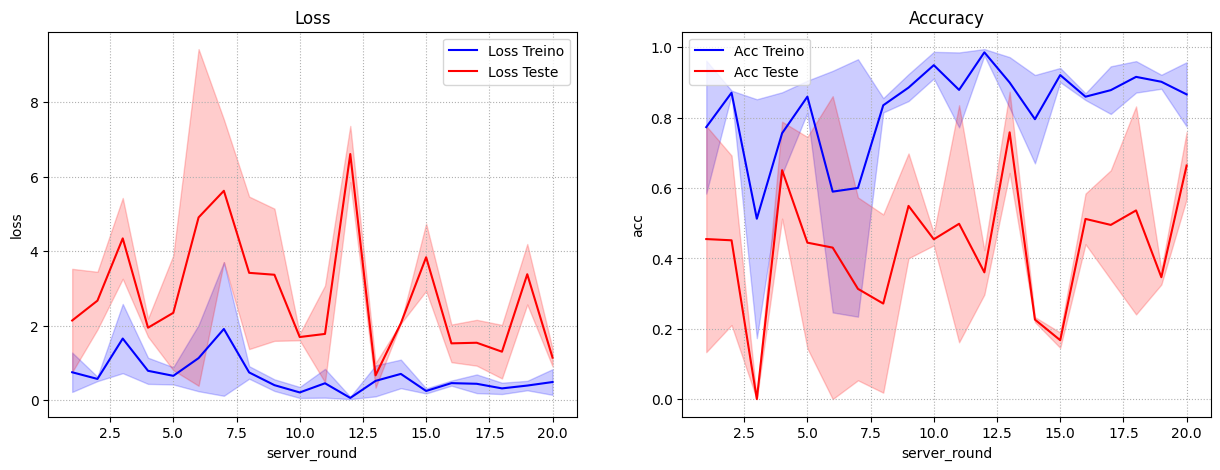

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv', names=['server_round', 'cid', 'acc', 'loss'])
df_test  = pd.read_csv('evaluate.csv', names=['server_round', 'cid', 'acc', 'loss'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.lineplot(data=df_train, x='server_round', y='loss', ax=ax[0], color='b', label='Loss Treino')
sns.lineplot(data=df_train, x='server_round', y='acc', ax=ax[1], color='b', label='Acc Treino')
sns.lineplot(data=df_test, x='server_round', y='loss', ax=ax[0], color='r', label='Loss Teste')
sns.lineplot(data=df_test, x='server_round', y='acc', ax=ax[1], color='r', label='Acc Teste')

ax[0].set_title('Loss')
ax[1].set_title('Accuracy')

ax[0].grid(True, linestyle=':')
ax[1].grid(True, linestyle=':')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


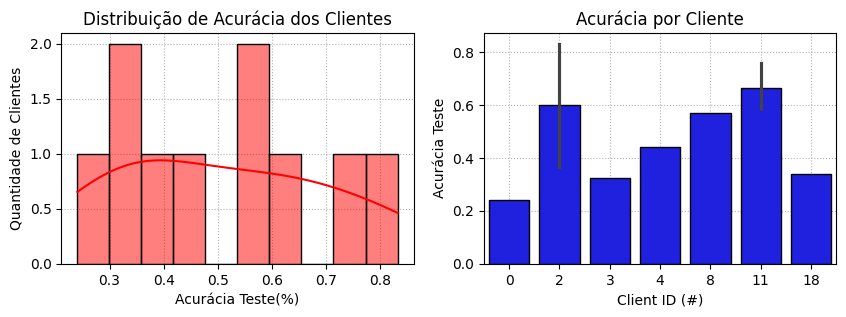

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=df_test['acc'].values[-10:], kde=True, color='r', bins=10, ax=ax[0])
sns.barplot(x=df_test['cid'].values[-10:], y=df_test['acc'].values[-10:], color='b', ec='k', ax=ax[1])

ax[0].set_title('Distribuição de Acurácia dos Clientes')
ax[0].set_ylabel('Quantidade de Clientes')
ax[0].set_xlabel('Acurácia Teste(%)')

ax[1].set_title('Acurácia por Cliente')
ax[1].set_ylabel('Acurácia Teste')
ax[1].set_xlabel('Client ID (#)')

for _ in range(2):
  ax[_].grid(True, linestyle=':')
  ax[_].set_axisbelow(True)

# Flower Simulation IID

In [28]:
NCLIENTS        = 20
NROUNDS         = 20
NIID            = False
DIRICHLET_ALPHA = 0.1
FRACTION_FIT    = 0.2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
def create_client(cid):
    client = Cliente(cid, NIID, NCLIENTS, DIRICHLET_ALPHA)
    return client.to_client()

In [30]:
class Simulation():
    def __init__(self):
        self.server  = Servidor(num_clients=NCLIENTS, dirichlet_alpha=DIRICHLET_ALPHA, fraction_fit=FRACTION_FIT)

    def run_simulation(self):
        fl.simulation.start_simulation(
            client_fn     = create_client,
            num_clients   = NCLIENTS,
            config        = fl.server.ServerConfig(num_rounds=NROUNDS),
            strategy      = self.server)

Simulation().run_simulation()

INFO :      Starting Flower simulation, config: num_rounds=20, no round_timeout
2024-10-07 02:03:35,281	INFO worker.py:1752 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 2.0, 'node:__internal_head__': 1.0, 'node:172.28.0.12': 1.0, 'object_store_memory': 3985448140.0, 'memory': 7970896283.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 1, 'num_gpus': 0.0}
INFO :      Flower VCE: Creating VirtualClientEngineActorPool with 2 actors
INFO :      [INIT]
INFO :      Requesting initial parameters from one random client
(pid=27739) 2024-10-07 02:03:42.724620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already be

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c04c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c04c0>]


(ClientAppActor pid=27739) /usr/local/lib/python3.10/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
(ClientAppActor pid=27739) given by the platformdirs library.  To remove this warning and
(ClientAppActor pid=27739) see the appropriate new directories, set the environment variable
(ClientAppActor pid=27739) `JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
(ClientAppActor pid=27739) The use of platformdirs will be the default in `jupyter_core` v6
(ClientAppActor pid=27739)   from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739) 
(ClientAppActor pid=27739)             This is a dep

 1/94 ━━━━━━━━━━━━━━━━━━━━ 1:28 956ms/step - accuracy: 0.0938 - loss: 2.2982
54/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 2.0659
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3306 - loss: 1.8957


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


60/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3001 - loss: 2.0179
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>]


(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739) 
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27739)         
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740) 
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.
(ClientAppActor pid=27740)        

 1/16 ━━━━━━━━━━━━━━━━━━━━ 7s 471ms/step - accuracy: 0.7812 - loss: 0.8804
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3726 - loss: 1.8738
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7730 - loss: 0.8939  


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 2]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 7s 501ms/step - accuracy: 0.7812 - loss: 1.0111
Rodada 1 acurácia agregada: 0.7559999823570251
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7720 - loss: 0.9216


(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)          [repeated 2x across cluster]
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


11/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7631 - loss: 0.8963 
41/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7933 - loss: 0.8333
77/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8072 - loss: 0.7826
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8128 - loss: 0.7607


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:35 2s/step - accuracy: 0.7500 - loss: 0.7772
55/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7835 - loss: 0.8284
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8625 - loss: 0.5269  
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8014 - loss: 0.7735


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 3]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.9375 - loss: 0.3560
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.4483  
Rodada 2 acurácia agregada: 0.8730000257492065
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92620>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 1:24 907ms/step - accuracy: 0.9688 - loss: 0.3066
58/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.5262
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8723 - loss: 0.5052
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:35 2s/step - accuracy: 0.8750 - loss: 0.7411
26/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8480 - loss: 0.5761


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92620>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>]
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8615 - loss: 0.5200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.4045  
83/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8589 - loss: 0.5278 [repeated 2x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 4]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated 

Rodada 3 acurácia agregada: 0.9039999842643738
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c21d0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>]
12/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8643 - loss: 0.5616  [repeated 2x across cluster]
41/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8742 - loss: 0.4941
53/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8751 - loss: 0.4824
67/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8761 - loss: 0.4713
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8773 -

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c21d0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 5]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.9062 - loss: 0.4062
32/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.3608 
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8948 - loss: 0.3858
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9198 - loss: 0.3160
Rodada 4 acurácia agregada: 0.9149999916553497
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.2820  
17/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9102 - loss: 0.3466 
 1/16 ━━━━━━━━━━━━━━━━━━━━ 6s 422ms/step - accuracy: 0.9375 - loss: 0.2955
50/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9071 - loss: 0.3433
85/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9043 - loss: 0.3492
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9037 - loss: 0.3501


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>]
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9050 - loss: 0.3495
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8679 - loss: 0.4096   [repeated 2x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 6]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated 

Rodada 5 acurácia agregada: 0.8960000276565552
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c2020>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c2020>]
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:46 2s/step - accuracy: 1.0000 - loss: 0.1429
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9010 - loss: 0.2835  
33/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9015 - loss: 0.3212
65/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.3137
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9087 - loss: 0.3174


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>]
 1/16 ━━━━━━━━━━━━━━━━━━━━ 9s 605ms/step - accuracy: 0.9062 - loss: 0.4886 [repeated 2x across cluster]
57/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9099 - loss: 0.3570
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9077 - loss: 0.3566
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9281 - loss: 0.2887


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 7]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated 

Rodada 6 acurácia agregada: 0.9180000126361847
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92620>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9039 - loss: 0.3013  
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:38 2s/step - accuracy: 1.0000 - loss: 0.1455
33/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9136 - loss: 0.2909
67/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9065 - loss: 0.3038
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9051 - loss: 0.3075


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:18 1s/step - accuracy: 0.9062 - loss: 0.2344
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92620>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


61/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 0.3130
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9065 - loss: 0.3165
 1/16 ━━━━━━━━━━━━━━━━━━━━ 9s 626ms/step - accuracy: 0.8750 - loss: 0.3708
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9122 - loss: 0.2966


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 8]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9147 - loss: 0.2950  
Rodada 7 acurácia agregada: 0.917000025510788
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92740>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92740>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


17/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9269 - loss: 0.2619 
46/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9155 - loss: 0.2899
76/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9124 - loss: 0.3029
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9117 - loss: 0.3069


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 0.9375 - loss: 0.2711
55/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8979 - loss: 0.3273
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9027 - loss: 0.3200
 1/16 ━━━━━━━━━━━━━━━━━━━━ 11s 761ms/step - accuracy: 0.9375 - loss: 0.2704
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9178 - loss: 0.2845


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 9]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated 

Rodada 8 acurácia agregada: 0.9289999902248383
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9079 - loss: 0.2998   
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:49 2s/step - accuracy: 0.9375 - loss: 0.1778
27/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9408 - loss: 0.2204
60/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9298 - loss: 0.2487
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9251 - loss: 0.2576


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 10]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated

Rodada 9 acurácia agregada: 0.9309999942779541
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c04c0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c04c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9179 - loss: 0.2375   
 1/94 ━━━━━━━━━━━━━━━━━━━━ 1:55 1s/step - accuracy: 0.8750 - loss: 0.3932
59/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9040 - loss: 0.3032
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9069 - loss: 0.2997
19/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9259 - loss: 0.2617  [repeated 2

INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:38 2s/step - accuracy: 0.8438 - loss: 0.8696
52/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9048 - loss: 0.3470
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a938e0>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9121 - loss: 0.3119
 1/16 ━━━━━━━━━━━━━━━━━━━━ 9s 652ms/step - accuracy: 0.8750 - loss: 0.4920
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9065 - loss: 0.3345


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 11]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.3296  
Rodada 10 acurácia agregada: 0.9120000004768372
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a922c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c21d0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a922c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c21d0>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 3:00 2s/step - accuracy: 0.9375 - loss: 0.3075
35/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9281 - loss: 0.2980
18/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9396 - loss: 0.2419 
67/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9237 - loss: 0.2954
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9239 - loss: 0.2878


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 12]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 11s 766ms/step - accuracy: 0.8438 - loss: 0.2499
46/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9373 - loss: 0.2484
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9352 - loss: 0.2510
 1/16 ━━━━━━━━━━━━━━━━━━━━ 10s 690ms/step - accuracy: 0.9375 - loss: 0.1838
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9261 - loss: 0.2374
Rodada 11 acurácia agregada: 0.9399999976158142
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:39 2s/step - accuracy: 0.8750 - loss: 0.4020
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9410 - loss: 0.2009
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:45 2s/step - accuracy: 1.0000 - loss: 0.1299
33/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 0.2876


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


48/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 0.2806
59/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9368 - loss: 0.2540
81/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9231 - loss: 0.2710
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9233 - loss: 0.2690
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9504 - loss: 0.2032   
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9380 - loss: 0.2563
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9357 - loss: 0.2508


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 13]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 8s 575ms/step - accuracy: 0.9688 - loss: 0.1573
Rodada 12 acurácia agregada: 0.9390000104904175
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92620>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92620>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1747  


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


14/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9506 - loss: 0.2489 
39/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.2462
50/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9412 - loss: 0.2432
75/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9409 - loss: 0.2364
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9409 - loss: 0.2323
 1/94 ━━━━━━━━━━━━━━━━━━━━ 3:19 2s/step - accuracy: 0.9688 - loss: 0.1750


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


61/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9367 - loss: 0.2370
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9204 - loss: 0.2486
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9333 - loss: 0.2425
 1/16 ━━━━━━━━━━━━━━━━━━━━ 12s 821ms/step - accuracy: 0.9375 - loss: 0.1627
Rodada 13 acurácia agregada: 0.9389999806880951
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c2020>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a91db0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c2020>]


(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.
(ClientAppActor pid=27740)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9551 - loss: 0.1612   
14/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9381 - loss: 0.1907 
47/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9281 - loss: 0.2330
78/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9284 - loss: 0.2359
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9287 - loss: 0.2359


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:27 2s/step - accuracy: 0.9688 - loss: 0.1179
53/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.2395
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>]


(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

 7/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9523 - loss: 0.1979   
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9333 - loss: 0.2406
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9473 - loss: 0.2101
Rodada 14 acurácia agregada: 0.9479999840259552
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c21d0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c2020>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c21d0>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9493 - loss: 0.1711
 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:55 2s/step - accuracy: 1.0000 - loss: 0.1169
36/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9432 - loss: 0.1855
71/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9404 - loss: 0.1975
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9388 - loss: 0.2041


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


29/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9515 - loss: 0.1989 
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c2020>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>]
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9429 - loss: 0.2107


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


 1/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8750 - loss: 0.2104
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9235 - loss: 0.2564
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9241 - loss: 0.2601


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 16]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9425 - loss: 0.1932  
Rodada 15 acurácia agregada: 0.9359999895095825
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90f40>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c37c0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0310>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


 1/94 ━━━━━━━━━━━━━━━━━━━━ 2:46 2s/step - accuracy: 0.9688 - loss: 0.0863
34/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.1713
66/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9442 - loss: 0.1850
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9437 - loss: 0.1886


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


30/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9546 - loss: 0.1566 
60/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9511 - loss: 0.1720
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90f40>]


(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.
(ClientAppActor pid=27740)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.


 1/16 ━━━━━━━━━━━━━━━━━━━━ 7s 527ms/step - accuracy: 0.9688 - loss: 0.1407
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9476 - loss: 0.1861
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9566 - loss: 0.1840


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 17]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated

Rodada 16 acurácia agregada: 0.9490000009536743
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9298 - loss: 0.2697  
17/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9398 - loss: 0.2262 
53/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9400 - loss: 0.2404


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9393 - loss: 0.2393
31/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9360 - loss: 0.2238 
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9420 - loss: 0.2354  
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9355 - loss: 0.2227


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 18]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.9375 - loss: 0.1416
Rodada 17 acurácia agregada: 0.9550000131130219
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92740>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90400>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92740>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.1229  


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


20/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9062 - loss: 0.2668 
40/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9145 - loss: 0.2619
64/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 0.2585
81/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9196 - loss: 0.2542
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9209 - loss: 0.2502


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0fd0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9378 - loss: 0.2484   [repeated 2x across cluster]
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9436 - loss: 0.2054 [repeated 4x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 19]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)


 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.9062 - loss: 0.3860
Rodada 18 acurácia agregada: 0.9389999806880951
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c0370>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3d00>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.2591  


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.


10/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9370 - loss: 0.2156 
30/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9285 - loss: 0.2312
53/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9284 - loss: 0.2311
71/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9287 - loss: 0.2301
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9295 - loss: 0.2278
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9300 - loss: 0.2267
 1/94 ━━━━━━━━━━━━━━━━━━━━ 5:05 3s/step - accuracy: 0.9688 - loss: 0.2847
32/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9386 - loss: 0.2068


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(Client

[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a92b60>]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9302 - loss: 0.2023  
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9364 - loss: 0.2120 [repeated 2x across cluster]


INFO :      aggregate_evaluate: received 2 results and 0 failures
INFO :      
INFO :      [ROUND 20]
INFO :      configure_fit: strategy sampled 2 clients (out of 20)
(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated

Rodada 19 acurácia agregada: 0.9429999887943268
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>]
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe619c3700>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a911e0>]
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:58 3s/step - accuracy: 0.9062 - loss: 0.1468
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9420 - loss: 0.1798  
14/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9149 - loss: 0.2729
29/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9214 - loss: 0.2623
41/94 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9239 - loss: 0.2585


INFO :      aggregate_fit: received 2 results and 0 failures
INFO :      configure_evaluate: strategy sampled 2 clients (out of 20)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9304 - loss: 0.2469
[<flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a90eb0>, <flwr.simulation.ray_transport.ray_client_proxy.RayActorClientProxy object at 0x7afe62a93c70>]


(ClientAppActor pid=27739)          [repeated 4x across cluster]
(ClientAppActor pid=27739) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27739)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27739)             entirely in future versions of Flower.
(ClientAppActor pid=27740) WARNING :   DEPRECATED FEATURE: `client_fn` now expects a signature `def client_fn(context: Context)`.The provided `client_fn` has signature: {'cid': <Parameter "cid">}. You can import the `Context` like this: `from flwr.common import Context`
(ClientAppActor pid=27740)             This is a deprecated feature. It will be removed
(ClientAppActor pid=27740)             entirely in future versions of Flower.
INFO :      aggregate_evaluate: received 2 results and 0 fail

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.2170  
 1/94 ━━━━━━━━━━━━━━━━━━━━ 4:58 3s/step - accuracy: 0.9688 - loss: 0.0823
19/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9450 - loss: 0.1811
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9458 - loss: 0.1925 [repeated 8x across cluster]
Rodada 20 acurácia agregada: 0.9469999969005585


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:293: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data = grouped.apply(agg, other).reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:293: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a futu

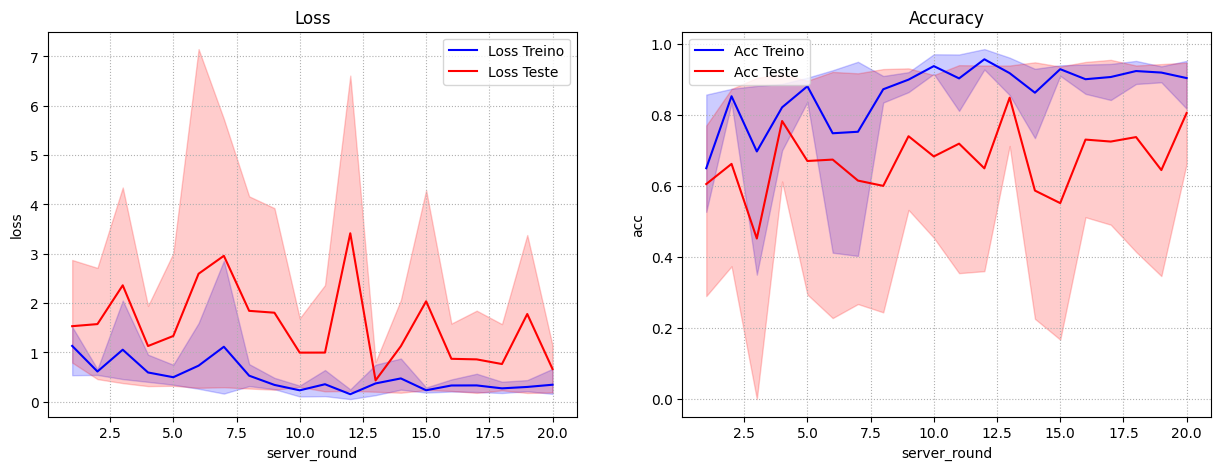

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv', names=['server_round', 'cid', 'acc', 'loss'])
df_test  = pd.read_csv('evaluate.csv', names=['server_round', 'cid', 'acc', 'loss'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.lineplot(data=df_train, x='server_round', y='loss', ax=ax[0], color='b', label='Loss Treino')
sns.lineplot(data=df_train, x='server_round', y='acc', ax=ax[1], color='b', label='Acc Treino')
sns.lineplot(data=df_test, x='server_round', y='loss', ax=ax[0], color='r', label='Loss Teste')
sns.lineplot(data=df_test, x='server_round', y='acc', ax=ax[1], color='r', label='Acc Teste')

ax[0].set_title('Loss')
ax[1].set_title('Accuracy')

ax[0].grid(True, linestyle=':')
ax[1].grid(True, linestyle=':')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


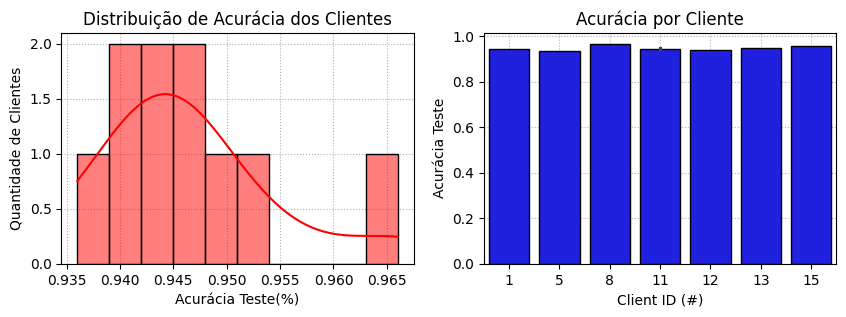

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(x=df_test['acc'].values[-10:], kde=True, color='r', bins=10, ax=ax[0])
sns.barplot(x=df_test['cid'].values[-10:], y=df_test['acc'].values[-10:], color='b', ec='k', ax=ax[1])

ax[0].set_title('Distribuição de Acurácia dos Clientes')
ax[0].set_ylabel('Quantidade de Clientes')
ax[0].set_xlabel('Acurácia Teste(%)')

ax[1].set_title('Acurácia por Cliente')
ax[1].set_ylabel('Acurácia Teste')
ax[1].set_xlabel('Client ID (#)')

for _ in range(2):
  ax[_].grid(True, linestyle=':')
  ax[_].set_axisbelow(True)